# Cargo librerias a implementar

In [12]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns

pip install matplotlib


# Importo los datos

In [13]:
data = pd.read_csv('D:/Marcos/Proyectos/Machine learning/Advertising.csv')
data.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


# Verificamos el min y max de df

In [14]:
data["Sales"].min()


1.6

In [15]:
data["Sales"].max()

27.0

# Correlacion de variables

In [16]:
data.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.782224
Radio,0.054809,1.000000,0.354104,0.576223
Newspaper,0.056648,0.354104,1.000000,0.228299
Sales,0.782224,0.576223,0.228299,1.000000


In [23]:
data.columns

Index(['TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

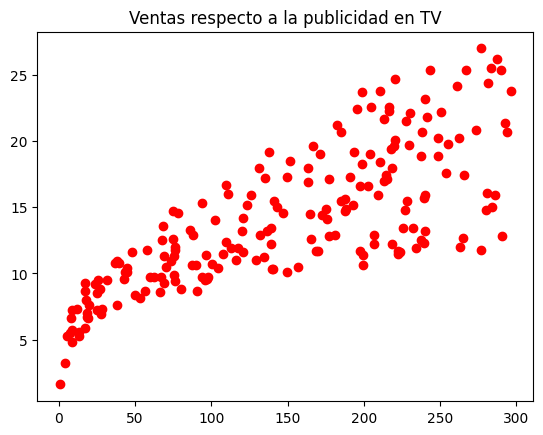

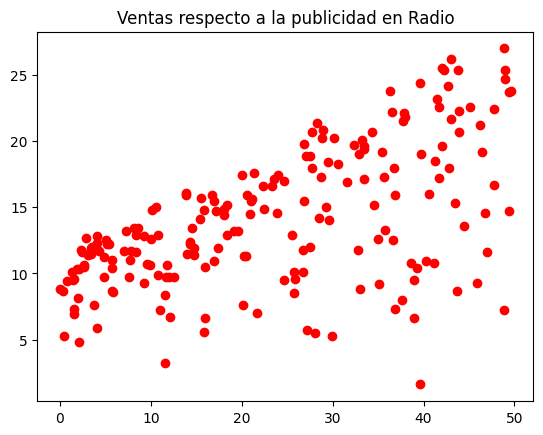

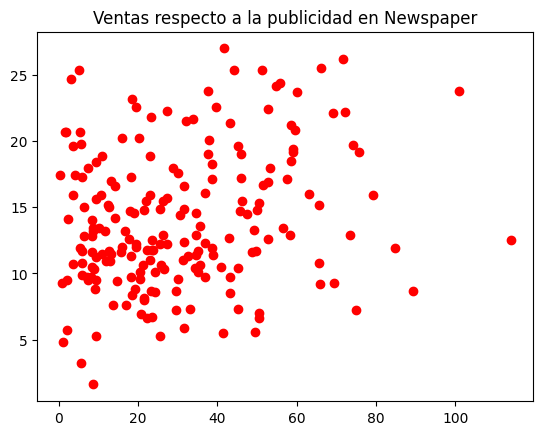

In [32]:
cols = ['TV', 'Radio', 'Newspaper']

for col in cols:
  plt.plot(data[col], data["Sales"], "ro")
  plt.title("Ventas respecto a la publicidad en %s" % col)
  plt.show()

## Creacion de modelos de regresion simple

# Instalo complementos

# TV

In [37]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

En este punto se utiliza el código `.values.reshape(-1,1)` es porque scikit-learn espera que las caracteristicas e entrada de un modelo de regresion sean una matriz bidimensional, donde cada fila representa una observación y cada columna representa una característica.

In [38]:
data_tv = data["TV"]
data_tv = data_tv.values.reshape(-1,1)

In [39]:
y = data["Sales"].values

Dividir entre en conjunto de entrenamiento y de testing

In [40]:
X_train, X_test, y_train, y_test = train_test_split(data_tv, y, test_size=0.3, random_state=42)

In [41]:
reg = LinearRegression()
reg.fit(X_train, y_train)

LinearRegression()

Medicion de predicciones

In [42]:
y_pred = reg.predict(X_test)
print("Predicciones: {}, Valores Actuales: {}".format(y_pred[:4], y_test[:4]))

Predicciones: [14.81785392 16.30754437 20.83230507  7.78243112], Valores Actuales: [16.9 22.4 21.4  7.3]


In [44]:
r_squared = reg.score(X_test, y_test)
rmse = mean_squared_error(y_test, y_pred, squared=False)
print(r_squared, rmse)

0.6714477229302764 2.9951613049072354


In [45]:
sales_comp = pd.DataFrame({
    "TV": X_test.flatten(),
    "realSales": y_test.flatten(),
    "predSales": y_pred.flatten()
})

sales_comp.head()

,TV,realSales,predSales
0,163.3,16.9,14.817854
1,195.4,22.4,16.307544
2,292.9,21.4,20.832305
3,11.7,7.3,7.782431
4,220.3,24.7,17.463099


Graficamos nuestro modelo junto a los datos de nuestro conjunto de testing

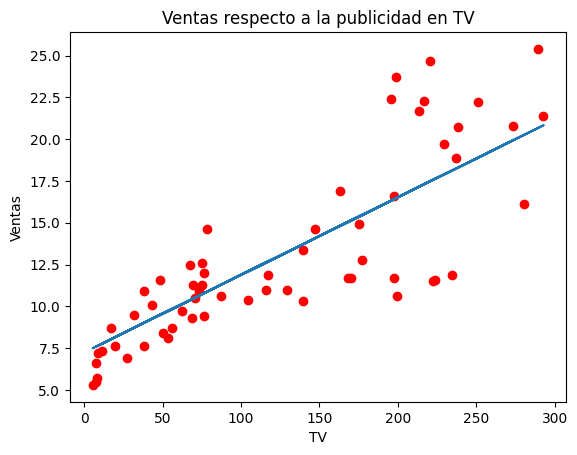

In [46]:
plt.plot(sales_comp["TV"], sales_comp["realSales"], "ro")
plt.plot(sales_comp["TV"], sales_comp["predSales"])
plt.title("Ventas respecto a la publicidad en TV")
plt.xlabel("TV")
plt.ylabel("Ventas")
plt.show()

# Radio

In [47]:
data_radio = data["Radio"]
data_radio = data_radio.values.reshape(-1,1)

Medicion de predicciones

In [49]:
y = data["Sales"].values
X_train, X_test, y_train, y_test = train_test_split(data_radio, y, test_size=0.3, random_state=42)
reg = LinearRegression()
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)

print("Predicciones: {}, Valores Actuales: {}".format(y_pred[:4], y_test[:4]))

Predicciones: [16.26772205 19.79791711 15.5441417  17.42983596], Valores Actuales: [16.9 22.4 21.4  7.3]


In [50]:
r_squared = reg.score(X_test, y_test)
rmse = mean_squared_error(y_test, y_pred, squared=False)

print(r_squared, rmse)

0.13116693684196756 4.870641281862208


In [51]:
sales_comp = pd.DataFrame({
    "Radio": X_test.flatten(),
    "realSales": y_test.flatten(),
    "predSales": y_pred.flatten()
})

sales_comp.head()

,Radio,realSales,predSales
0,31.6,16.9,16.267722
1,47.7,22.4,19.797917
2,28.3,21.4,15.544142
3,36.9,7.3,17.429836
4,49.0,24.7,20.082964


Graficamos nuestro modelo junto a los datos de nuestro conjunto de testing

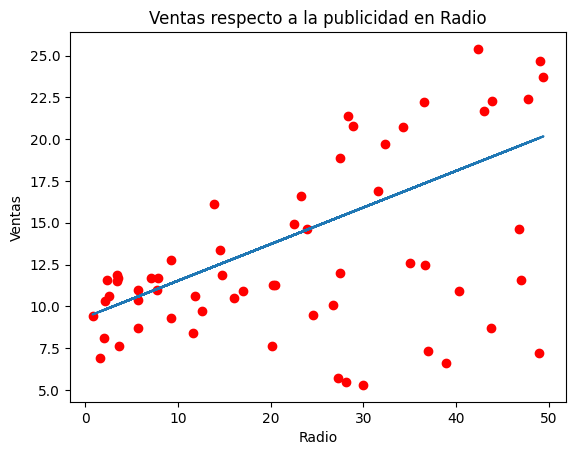

In [52]:
plt.plot(sales_comp["Radio"], sales_comp["realSales"], "ro")
plt.plot(sales_comp["Radio"], sales_comp["predSales"])
plt.title("Ventas respecto a la publicidad en Radio")
plt.xlabel("Radio")
plt.ylabel("Ventas")
plt.show()

# Periodico

In [53]:
data_newspaper = data["Newspaper"]
data_newspaper = data_newspaper.values.reshape(-1,1)
y = data["Sales"].values
X_train, X_test, y_train, y_test = train_test_split(data_newspaper, y, test_size=0.3, random_state=42)
reg = LinearRegression()
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)

print("Predicciones: {}, Valores Actuales: {}".format(y_pred[:4], y_test[:4]))

Predicciones: [15.86524548 15.86524548 15.27418406 15.39605239], Valores Actuales: [16.9 22.4 21.4  7.3]


In [54]:
r_squared = reg.score(X_test, y_test)
rmse = mean_squared_error(y_test, y_pred, squared=False)

print(r_squared, rmse)

-0.057301173788661064 5.373006089766974


In [55]:
sales_comp = pd.DataFrame({
    "Newspaper": X_test.flatten(),
    "realSales": y_test.flatten(),
    "predSales": y_pred.flatten()
})

sales_comp.head()

,Newspaper,realSales,predSales
0,52.9,16.9,15.865245
1,52.9,22.4,15.865245
2,43.2,21.4,15.274184
3,45.2,7.3,15.396052
4,3.2,24.7,12.836817


Graficamos nuestro modelo junto a los datos de nuestro conjunto de testing

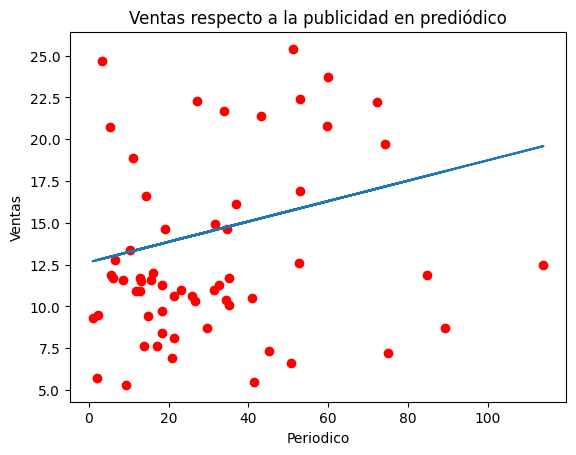

In [56]:
plt.plot(sales_comp["Newspaper"], sales_comp["realSales"], "ro")
plt.plot(sales_comp["Newspaper"], sales_comp["predSales"])
plt.title("Ventas respecto a la publicidad en prediódico")
plt.xlabel("Periodico")
plt.ylabel("Ventas")
plt.show()

# Creación de los modelos de regresión múltiple

TV- Periodico

In [57]:
X = data.drop(["Radio", "Sales"], axis=1).values
y = data["Sales"].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
reg = LinearRegression()
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)

print("Predicciones: {}, Valores Actuales: {}".format(y_pred[:4], y_test[:4]))

Predicciones: [16.04429782 17.51962128 21.46954703  8.65505487], Valores Actuales: [16.9 22.4 21.4  7.3]


In [58]:
r_squared = reg.score(X_test, y_test)
rmse = mean_squared_error(y_test, y_pred, squared=False)

print(r_squared, rmse)

0.668935545006016 3.0065903074245406


# TV - Radio

In [59]:
X = data.drop(["Newspaper", "Sales"], axis=1).values
y = data["Sales"].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
reg = LinearRegression()
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)

print("Predicciones: {}, Valores Actuales: {}".format(y_pred[:4], y_test[:4]))

Predicciones: [16.43778963 21.11462413 21.48161733 10.82947123], Valores Actuales: [16.9 22.4 21.4  7.3]


In [60]:
r_squared = reg.score(X_test, y_test)
rmse = mean_squared_error(y_test, y_pred, squared=False)

print(r_squared, rmse)

0.8656253548947075 1.9154756731764253


In [61]:
sales_comp = pd.DataFrame({
    "TV": X_test[:, 0].flatten(),
    "Radio": X_test[:, 1].flatten(),
    "realSales": y_test.flatten(),
    "predSales": y_pred.flatten()
})

sales_comp.head()

,TV,Radio,realSales,predSales
0,163.3,31.6,16.9,16.437790
1,195.4,47.7,22.4,21.114624
2,292.9,28.3,21.4,21.481617
3,11.7,36.9,7.3,10.829471
4,220.3,49.0,24.7,22.475538


<Axes: xlabel='realSales', ylabel='predSales'>

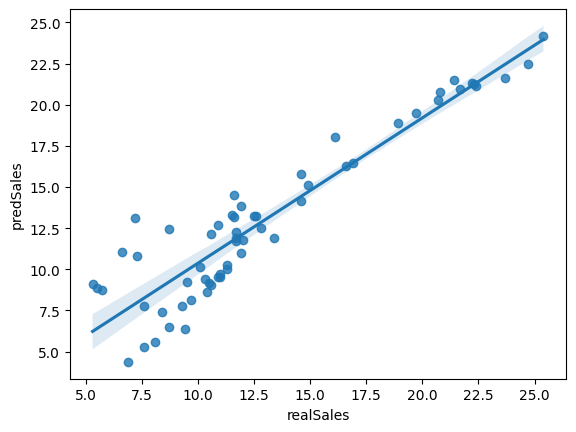

In [64]:
sns.regplot(x = sales_comp["realSales"], y = sales_comp["predSales"])